In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
companies = pd.read_csv('AML_LinearRegression.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [4]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

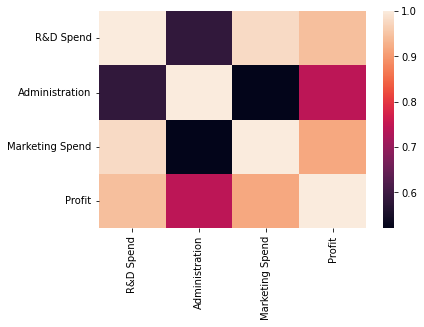

In [5]:
sns.heatmap(companies.corr())

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
lblencoder = LabelEncoder()
X[:, 3] = lblencoder.fit_transform(X[:, 3])
ohe = ColumnTransformer([('my_ohe', OneHotEncoder(),[0])], remainder='passthrough')
X = ohe.fit_transform(X)

In [7]:
X = X[:, 1:]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_train)
y_pred

In [12]:
print(model.coef_)

[ 6.90895137e+04  0.00000000e+00  5.29521081e+03  5.29090690e+03
 -9.19761353e+04  5.26181586e+03  0.00000000e+00  1.07687127e+04
  1.07678359e+04  5.18458525e+03  7.96258168e+03  7.96162528e+03
  5.17828883e+03  1.07368320e+04  5.14585039e+03  0.00000000e+00
  1.06829540e+04  5.10719521e+03  5.09420387e+03  7.86925138e+03
  1.06445378e+04  1.06299526e+04  0.00000000e+00  1.06066000e+04
  5.00533681e+03  5.00087356e+03  4.98501300e+03  0.00000000e+00
  1.05210008e+04  7.70283484e+03  7.69733547e+03  7.68928558e+03
  4.90578980e+03  4.90060920e+03  4.84163024e+03  7.61779349e+03
  4.83613079e+03  7.60663524e+03  7.59691169e+03  4.81413323e+03
  4.77715183e+03  4.77547807e+03  4.76336342e+03  4.75770463e+03
  1.02887509e+04  0.00000000e+00  1.02293734e+04  1.02281778e+04
  4.66843908e+03  1.02222003e+04  0.00000000e+00  1.02092089e+04
  1.02021155e+04  1.01950221e+04  4.62468304e+03  7.38530451e+03
  7.37805169e+03  0.00000000e+00  0.00000000e+00  1.00983443e+04
  1.00942796e+04  0.00000

In [13]:
print(model.intercept_)

-81668.0617313337


In [15]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.9996273352859235